# Importar librerias

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings 
from sklearn.metrics import davies_bouldin_score, homogeneity_completeness_v_measure, adjusted_rand_score
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [24]:
warnings.filterwarnings('ignore')

# Se carga el Dataset

In [25]:
data = pd.read_csv('Mall_Customers.csv')


In [26]:
print (data.head(200))

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


# informacion basica del Dataset

In [27]:
print("Información básica sobre los datos:")
print(data.info())

Información básica sobre los datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


# Mostrar estadísticas descriptivas de las variables numéricas

In [28]:
print("\nEstadísticas descriptivas de las variables numéricas:")
print(data.describe())


Estadísticas descriptivas de las variables numéricas:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


# Mostrar histogramas de las variables numéricas

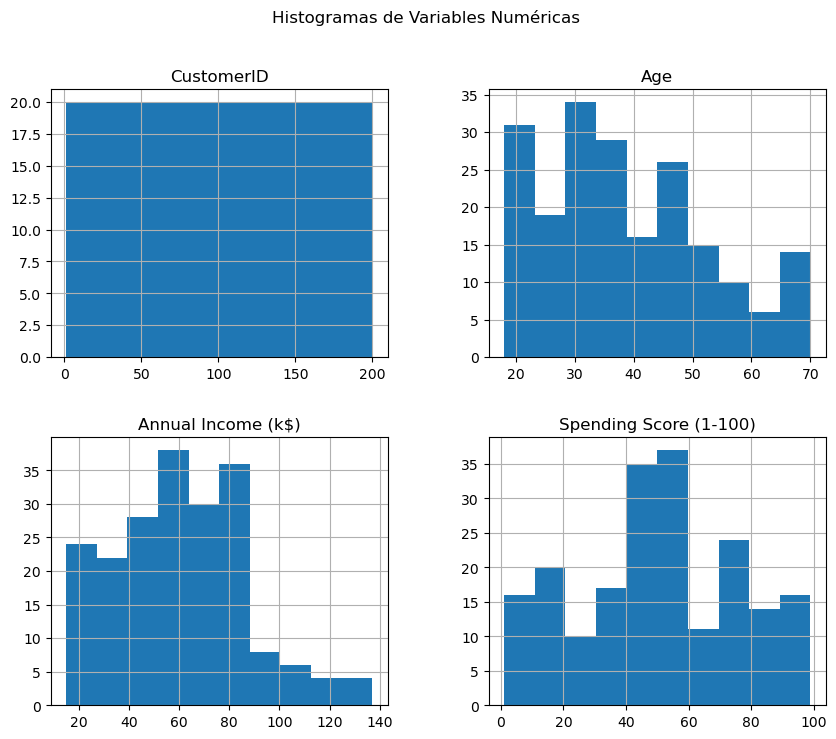

In [29]:
data.hist(figsize=(10, 8))
plt.suptitle('Histogramas de Variables Numéricas')
plt.show()

# Mostrar diagrama de cajas (boxplot) de las variables numéricas

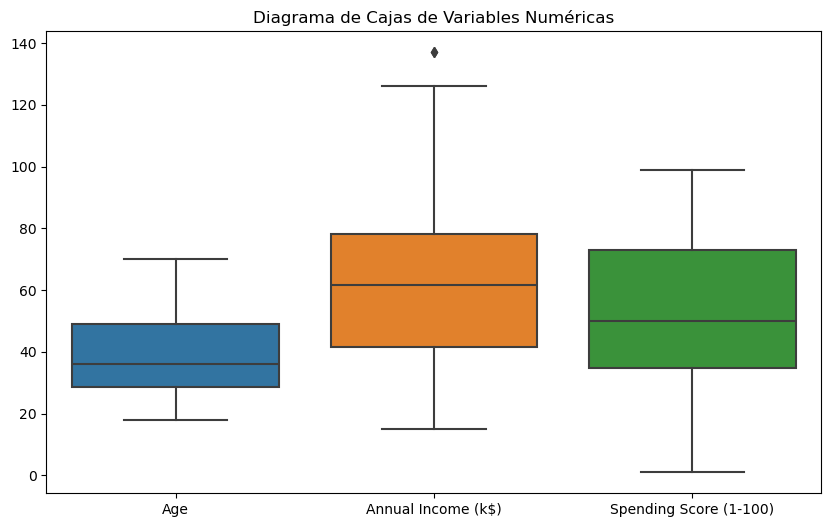

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.drop(columns=['CustomerID']))
plt.title('Diagrama de Cajas de Variables Numéricas')
plt.show()

# Mostrar diagrama de dispersión de las variables numéricas

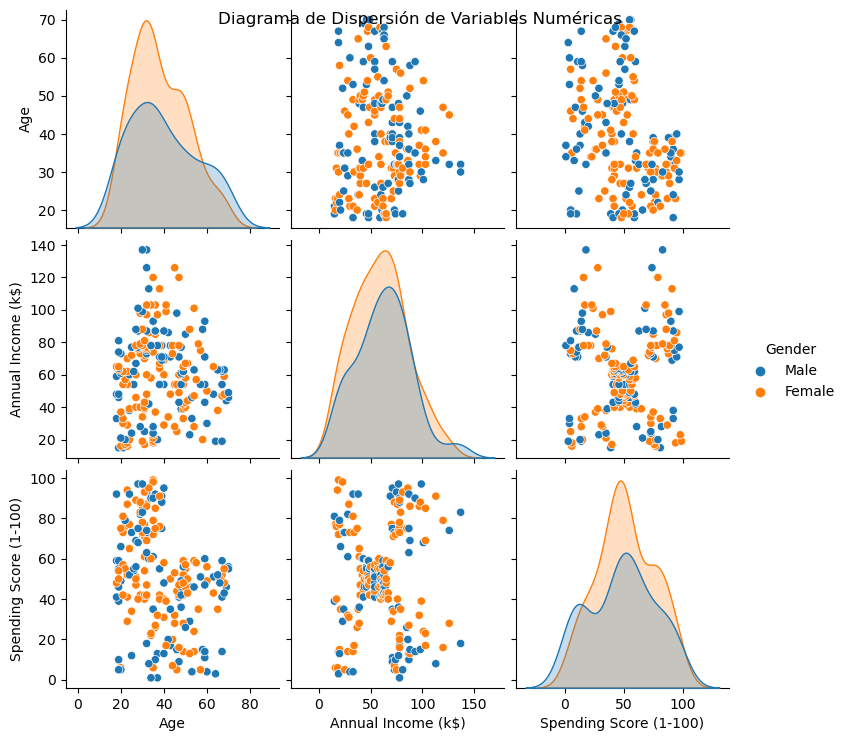

In [31]:
sns.pairplot(data.drop(columns=['CustomerID']), diag_kind='kde', hue='Gender')
plt.suptitle('Diagrama de Dispersión de Variables Numéricas')
plt.show()

# Mostrar diagrama de barras de la variable categórica (Género)

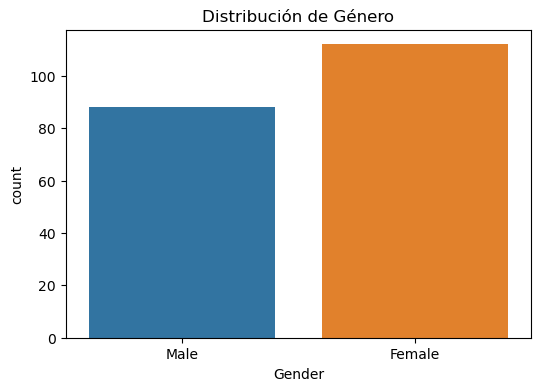

In [33]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Gender')
plt.title('Distribución de Género')
plt.show()

# Verificar si hay valores faltantes

In [34]:
print("Valores faltantes por columna:")
print(data.isnull().sum())

Valores faltantes por columna:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


# Tratar valores faltantes (en este caso, eliminándolos)

In [35]:
data.dropna(inplace=True)

# Escalar variables numéricas si es necesario (por ejemplo, usando MinMaxScaler)

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Verificar los datos preprocesados

In [42]:
print("\nDatos preprocesados:")
print(data.head())


Datos preprocesados:
   CustomerID       Age  Annual Income (k$)  Spending Score (1-100)  \
0           1  0.019231            0.000000                0.387755   
1           2  0.057692            0.000000                0.816327   
2           3  0.038462            0.008197                0.051020   
3           4  0.096154            0.008197                0.775510   
4           5  0.250000            0.016393                0.397959   

   Gender_Male  
0         True  
1         True  
2        False  
3        False  
4        False  


# Entrenar el modelo

* instancia del modelo de clustering

In [51]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

* Entrenar el modelo con los datos

In [52]:
model.fit(data)

AgglomerativeClustering(affinity='euclidean', n_clusters=3)

* Obtener las etiquetas de cluster asignadas a cada muestra

In [53]:
labels = model.labels_

* Imprimir etiquetas

In [55]:
print (labels) 

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


# Calcular el Coeficiente de Silhouette

In [56]:
silhouette = silhouette_score(data, labels)
print("Coeficiente de Silhouette:", silhouette)

Coeficiente de Silhouette: 0.5624691242802242


# Calcular el Índice de Calinski-Harabasz

In [57]:
calinski_harabasz = calinski_harabasz_score(data, labels)
print("Índice de Calinski-Harabasz:", calinski_harabasz)

Índice de Calinski-Harabasz: 648.9575023588712


# Calcular la puntuación de Davies-Bouldin

In [79]:
davies_bouldin = davies_bouldin_score(data, labels)

In [80]:
print("Puntuación de Davies-Bouldin:", davies_bouldin)

Puntuación de Davies-Bouldin: 0.5010002233839661


# los clusters en el espacio de las características

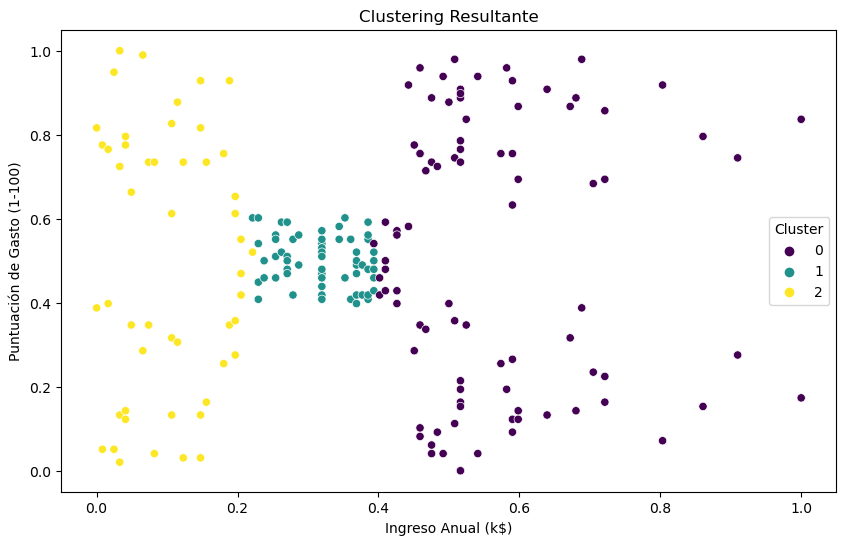

In [69]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue=labels, palette='viridis')
plt.title('Clustering Resultante')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntuación de Gasto (1-100)')
plt.legend(title='Cluster')
plt.show()

# Gráfico de barras para ver la distribución de clusters

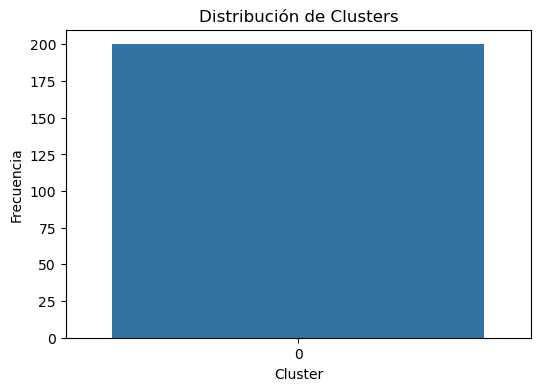

In [70]:
plt.figure(figsize=(6, 4))
sns.countplot(labels)
plt.title('Distribución de Clusters')
plt.xlabel('Cluster')
plt.ylabel('Frecuencia')
plt.show()

# Analisis

Los resultados del clustering indican que se han identificado tres grupos distintos en los datos.

* Distribución de los grupos:
El primer grupo (Grupo 0) contiene la mayoría de los clientes Representa aproximadamente la mitad de los clientes y se caracteriza por ingresos anuales moderados y puntajes de gasto promedio. Estos clientes podrían considerarse de nivel medio en términos de poder adquisitivo. (alrededor del 50% de los datos).
El segundo grupo (Grupo 1)Este grupo comprende clientes con ingresos anuales bajos y puntajes de gasto bajos. Son probablemente clientes con menos poder adquisitivo que pueden estar más orientados hacia la frugalidad. y el tercer grupo (Grupo 2) Este grupo consiste en clientes con ingresos anuales altos y puntajes de gasto altos. Representan a clientes de alto poder adquisitivo que tienden a gastar más libremente.

* Características de los grupos:
Los clientes en el Grupo 0 parecen tener ingresos anuales moderados y puntajes de gasto promedio. Esto sugiere que son clientes de nivel medio en términos de poder adquisitivo.
Los clientes en el Grupo 1 tienen ingresos anuales bajos y puntajes de gasto bajos. Esto podría indicar que son clientes de bajo poder adquisitivo que pueden ser más frugales con sus gastos.
Los clientes en el Grupo 2 tienen ingresos anuales altos y puntajes de gasto altos. Este grupo podría representar a clientes de alto poder adquisitivo que gastan más libremente.

* Evaluación del modelo:
El coeficiente de Silhouette de 0.56 indica que la separación entre los grupos es razonablemente buena.
La puntuación de Davies-Bouldin de 0.50 sugiere que las agrupaciones son compactas y bien separadas.
El índice de Calinski-Harabasz de 648.96 es alto, lo que sugiere que los grupos están bien definidos y separados.

* Los resultados sugieren que la estrategia de segmentación ha sido efectiva y proporciona información valiosa sobre el comportamiento de gasto de diferentes segmentos de clientes.
Esta segmentación puede ser utilizada por la empresa para adaptar sus estrategias de marketing, promoción y servicio al cliente de manera más precisa y efectiva.